In [46]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [49]:
data_size = 7366
data = pd.read_csv(f"../data/processed_data/clean_data_{data_size}.csv")

In [50]:
data.head()

,price,city,state,usable_areas,parking_spaces,suites,bathrooms,bedrooms,price_cat
0,850000,Rio de Janeiro,Rio de Janeiro,1.827291,4,0,3,4,2
1,680000,São Paulo,São Paulo,-0.430787,2,1,3,3,2
2,590000,Campo Grande,Mato Grosso do Sul,-0.681685,2,1,2,3,2
3,297000,Praia Grande,São Paulo,0.497534,2,1,3,3,1
4,300000,Piracicaba,São Paulo,2.830881,4,4,5,4,1


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["price", "city", "state", "price_cat"]),
    data["price"],
    test_size=0.2,
    random_state=42,
)

In [52]:
# Linear Regression
from sklearn.linear_model import LinearRegression


# SVR
from sklearn.svm import SVR

# XGBoost
from xgboost import XGBRegressor

# MLP Regressor
from sklearn.neural_network import MLPRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [53]:
models = [
    LinearRegression(),
    SVR(),
    XGBRegressor(),
    MLPRegressor(),
    RandomForestRegressor(),
]

params = {
    type(LinearRegression()).__name__: {
        "fit_intercept": [True, False],
    },
    type(SVR()).__name__: {
        "kernel": ["poly", "rbf", "sigmoid"],
        "degree": [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "C": [0.1, 1, 10],
    },
    type(XGBRegressor()).__name__: {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5, 6, 7],
        "learning_rate": [0.01, 0.05, 0.1],
        "gamma": [0, 0.25, 1.0],
    },
    type(MLPRegressor()).__name__: {
        "hidden_layer_sizes": [(5, 3), (14, 7, 3), (140, 140, 140)],
        "activation": ["relu"],
        "n_iter_no_change": [50],
    },
    type(RandomForestRegressor()).__name__: {
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
    },
}

In [8]:
from sklearn.model_selection import GridSearchCV
import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.auto import tqdm
from sklearn.metrics import mean_absolute_error

# Perform cross-validation for each model
for model in tqdm(models, desc="Training"):
    print("Training %s\n" % type(model).__name__)
    model_name = type(model).__name__
    model_params = params[model_name]

    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=model, param_grid=model_params, cv=5)

    # Fit the model and perform cross-validation
    grid_search.fit(X_train, y_train)

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Calculate predictions
    y_pred = grid_search.predict(X_train)

    # Calculate R2 score
    r2 = r2_score(y_train, y_pred)

    mae = mean_absolute_error(y_train, y_pred)

    # Calculate RMSE
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}")
    print(f"R2 score for {model_name}: {r2}")
    print(f"RMSE for {model_name}: {rmse}")
    print(f"Mae score for {model_name}: {mae}")

/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training:   0%|          | 0/5 [00:00<?, ?it/s]

Training LinearRegression

Best parameters for LinearRegression: {'fit_intercept': True}
Best score for LinearRegression: 0.407650585430957
R2 score for LinearRegression: 0.40929320841965455
RMSE for LinearRegression: 349589.63860886707
Mae score for LinearRegression: 245429.12187774398
Training SVR



In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Train Mean Absolute Error:", mae_train)
    print("Train R2 Score:", r2_train)
    print(
        "Train Root Mean Squared Error:",
        rmse_train,
    )

    print("Test Mean Absolute Error:", mae_test)
    print("Test R2 Score:", r2_test)
    print(
        "Test Root Mean Squared Error:",
        rmse_test,
    )
    return (
        type(model).__name__,
        mae_train,
        mae_test,
        r2_train,
        r2_test,
        rmse_train,
        rmse_test,
    )

## Models 

In [55]:
results = []

In [56]:
y_train.mean()

698727.6578411405

### Linear Regression

- Linear regression assumes a linear relationship between the input features and the target variable.
- It fits a straight line to the data points that minimizes the distance between the predicted and actual values.
- It can be used for both regression (continuous target variable) and simple prediction tasks.
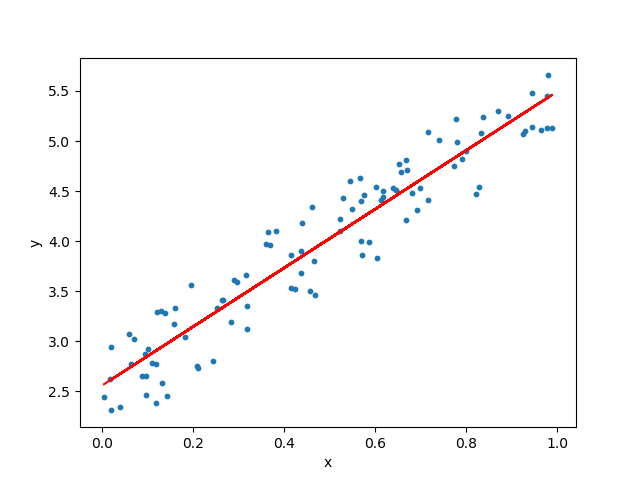

In [57]:
from sklearn.linear_model import LinearRegression

params = {"fit_intercept": False}
model = LinearRegression(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 246857.01643203082
Train R2 Score: 0.33921545898401584
Train Root Mean Squared Error: 361299.66797374905
Test Mean Absolute Error: 232607.3806067084
Test R2 Score: 0.3866631775002497
Test Root Mean Squared Error: 336605.9361816477


### SVR

- SVR is an extension of support vector machines (SVM) for regression tasks.
- It aims to find a hyperplane that best fits the data, while minimizing the error within a certain margin (epsilon).
- It is effective for handling both linear and non-linear relationships in the data.
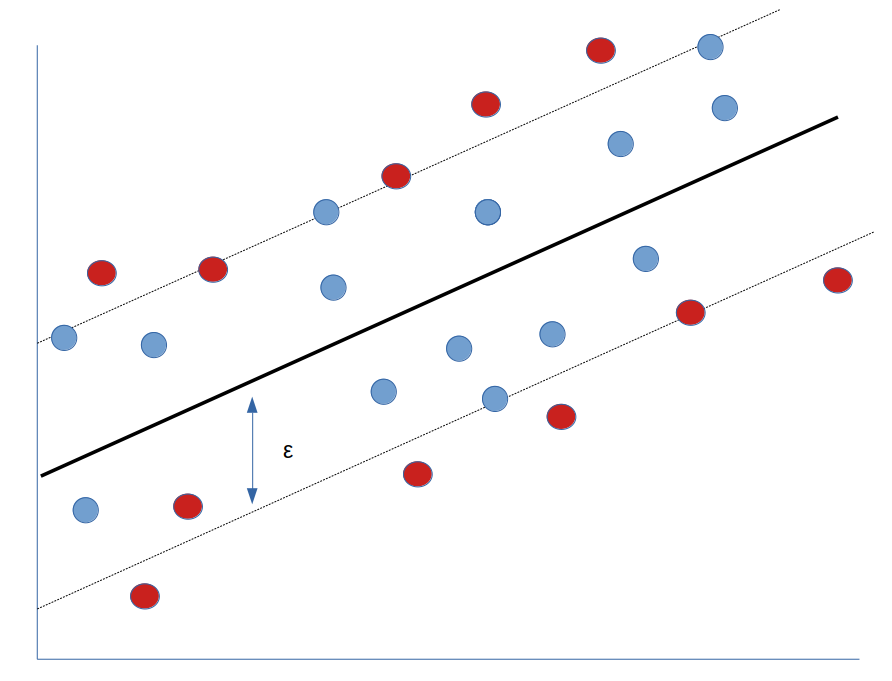

In [58]:
params = {"C": 10, "degree": 5, "kernel": "poly"}
model = SVR(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 284276.7157455735
Train R2 Score: -0.16778796370460336
Train Root Mean Squared Error: 480307.7815014936
Test Mean Absolute Error: 274682.46760079835
Test R2 Score: -0.20197665014810662
Test Root Mean Squared Error: 471216.25862500235


### XGBoost

- XGBoost is a powerful gradient boosting algorithm for regression tasks.
- It combines multiple weak prediction models (decision trees) to make accurate predictions.
- It uses gradient descent optimization to iteratively improve the model's predictions by minimizing the loss function.

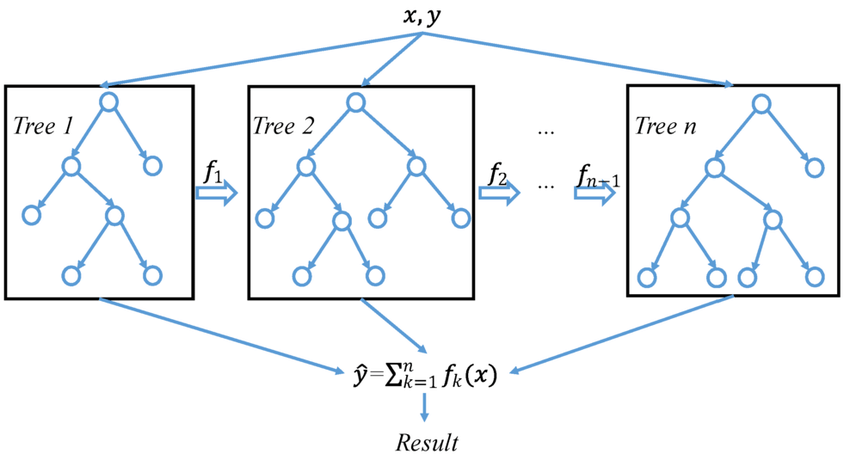

In [59]:
params = {"gamma": 0, "learning_rate": 0.01, "max_depth": 3, "n_estimators": 200}
model = XGBRegressor(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 229881.79034071622
Train R2 Score: 0.3675766341109087
Train Root Mean Squared Error: 353461.0628300932
Test Mean Absolute Error: 221731.9151119403
Test R2 Score: 0.38818833697742994
Test Root Mean Squared Error: 336187.1636075478



### MLP Regressor

- MLPRegressor stands for Multi-Layer Perceptron regressor, which is a type of artificial neural network.
- It consists of multiple layers of interconnected nodes (neurons) that learn to map inputs to outputs.
- It is capable of capturing complex relationships between features and the target variable, making it suitable for a wide range of regression tasks.

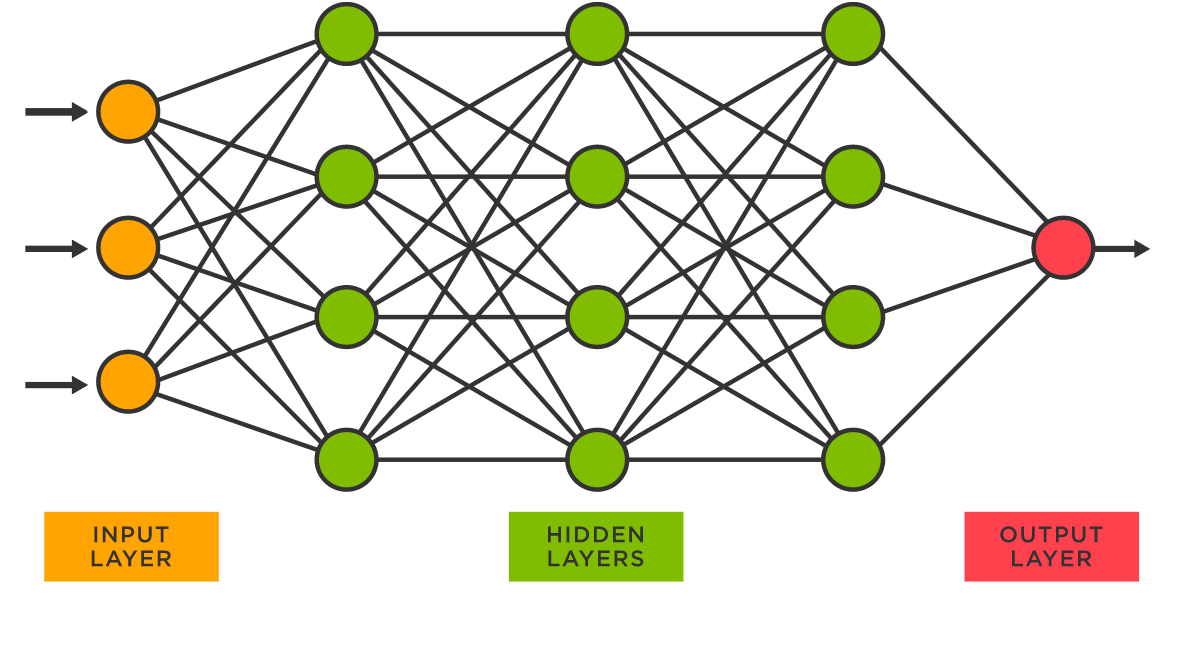

In [60]:
params = {
    "activation": "relu",
    "hidden_layer_sizes": (140, 140, 140),
    "n_iter_no_change": 50,
}
model = MLPRegressor(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Mean Absolute Error: 239957.4825535693
Train R2 Score: 0.3943506671760908
Train Root Mean Squared Error: 345898.1561426528
Test Mean Absolute Error: 227493.20998880858
Test R2 Score: 0.4393309171073957
Test Root Mean Squared Error: 321829.2812951091


/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Random Forest

- RandomForestRegressor is an ensemble learning method based on decision trees.
- It constructs multiple decision trees and combines their predictions to obtain a more accurate result.
- It leverages the concept of random feature selection and bagging to reduce overfitting and improve generalization.
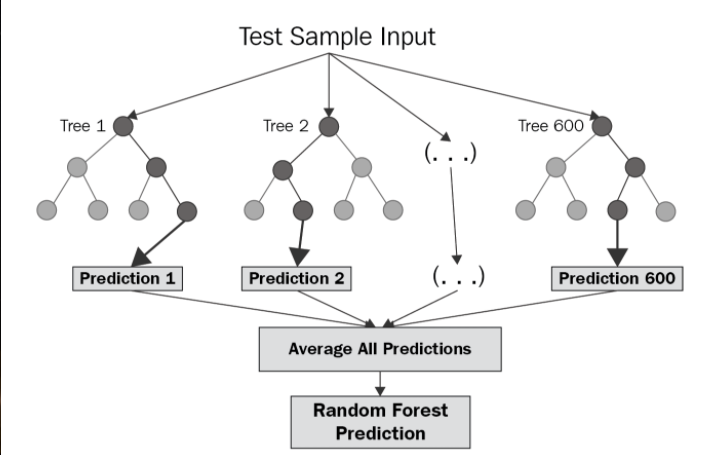

In [61]:
params = {
    "max_depth": 20,
    "max_features": "sqrt",
    "min_samples_leaf": 2,
    "min_samples_split": 2,
    "n_estimators": 200,
}
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 168580.49418791255
Train R2 Score: 0.6973575536127181
Train Root Mean Squared Error: 244513.33254728335
Test Mean Absolute Error: 217983.5427316887
Test R2 Score: 0.4635373764857845
Test Root Mean Squared Error: 314805.2639960006


### Visualize the results

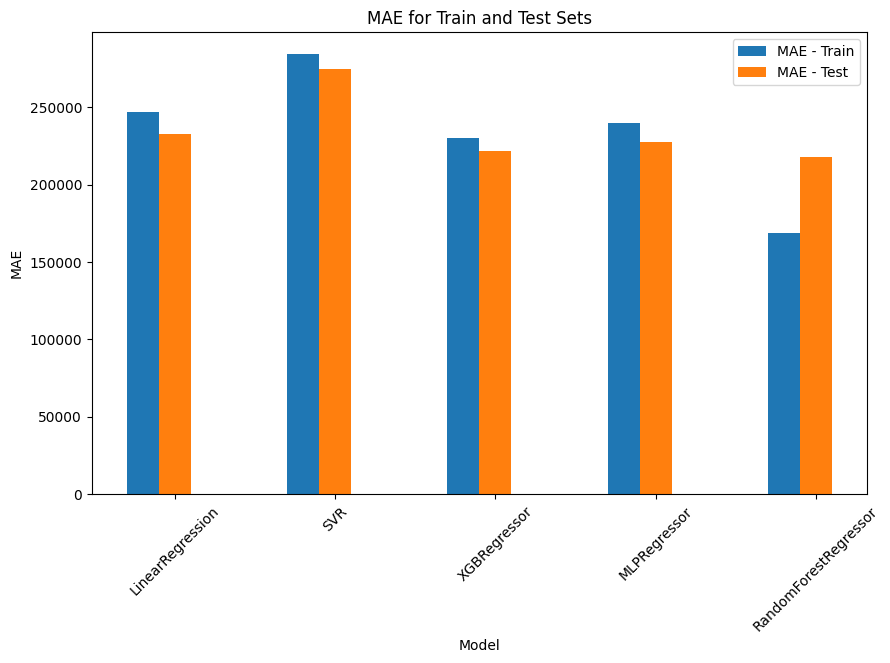

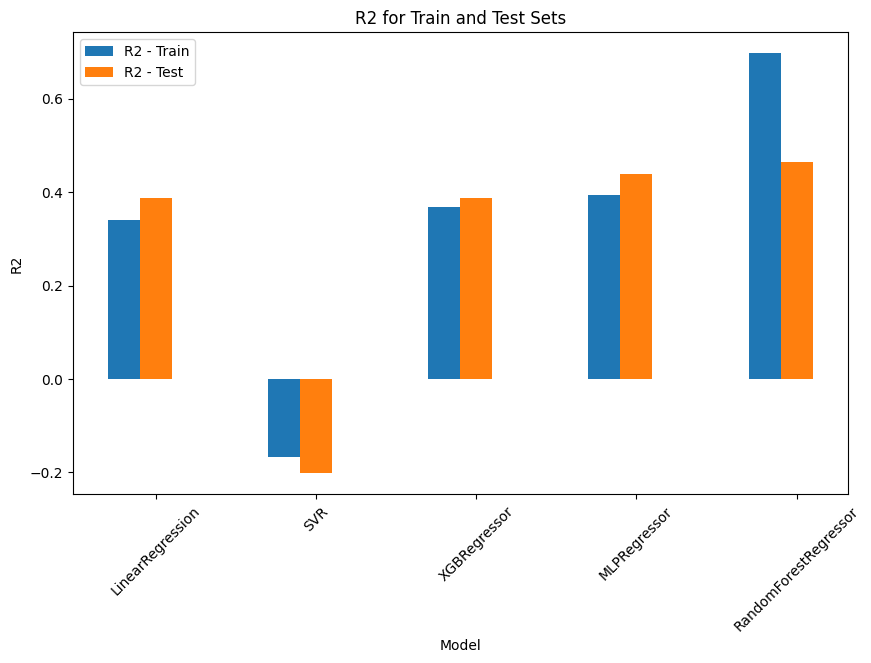

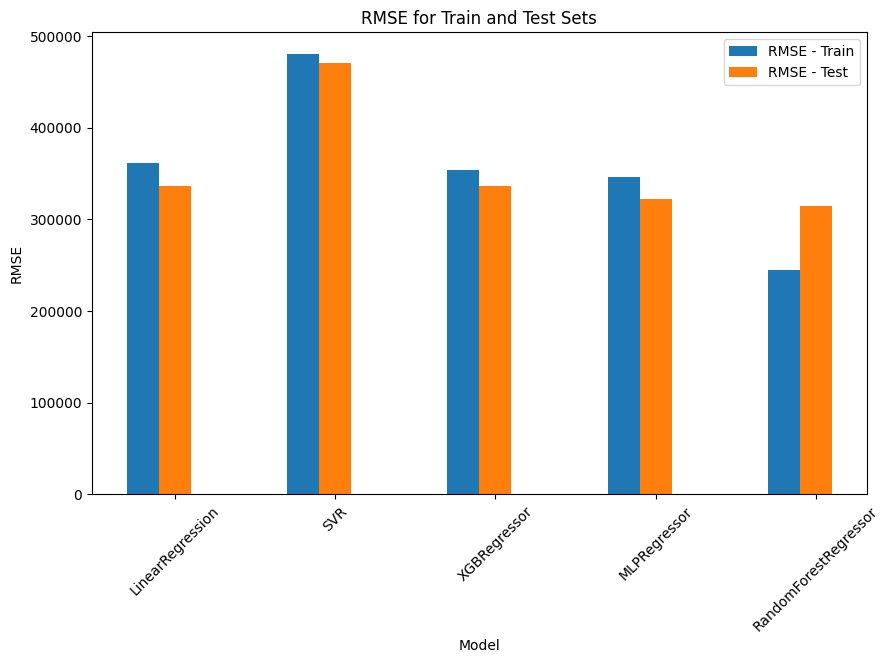

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting the error metrics from the results
models = []
mae_train = []
mae_test = []
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

for result in results:
    (
        model_name,
        mae_train_val,
        mae_test_val,
        r2_train_val,
        r2_test_val,
        rmse_train_val,
        rmse_test_val,
    ) = result
    models.append(model_name)
    mae_train.append(mae_train_val)
    mae_test.append(mae_test_val)
    r2_train.append(r2_train_val)
    r2_test.append(r2_test_val)
    rmse_train.append(rmse_train_val)
    rmse_test.append(rmse_test_val)

# Plotting MAE
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.2
plt.bar(x - width, mae_train, width, label="MAE - Train")
plt.bar(x, mae_test, width, label="MAE - Test")
plt.xticks(x, models, rotation=45)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE for Train and Test Sets")
plt.legend()
plt.show()

# Plotting R2
plt.figure(figsize=(10, 6))
plt.bar(x - width, r2_train, width, label="R2 - Train")
plt.bar(x, r2_test, width, label="R2 - Test")
plt.xticks(x, models, rotation=45)
plt.xlabel("Model")
plt.ylabel("R2")
plt.title("R2 for Train and Test Sets")
plt.legend()
plt.show()

# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.bar(x - width, rmse_train, width, label="RMSE - Train")
plt.bar(x, rmse_test, width, label="RMSE - Test")
plt.xticks(x, models, rotation=45)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE for Train and Test Sets")
plt.legend()
plt.show()